# <font color = blue>PART I:</font>
# EDA & Data Preprocessing on Google App Store Rating Dataset.
## Domain: Mobile device appse

## 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
Apps_data = pd.read_csv('Apps_data+(1).csv')
Apps_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
Apps_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4521,Q-slope,TOOLS,4.5,2,3.9M,50+,Paid,$1.76,Everyone,Tools,"December 3, 2017",5.0,4.3 and up
10672,FNH Payment Info,COMMUNICATION,NaN,0,2.1M,10+,Free,0,Everyone,Communication,"March 17, 2018",1.3,4.0.3 and up
664,"Hily: Dating, Chat, Match, Meet & Hook up",DATING,4.1,2560,56M,"100,000+",Free,0,Mature 17+,Dating,"August 1, 2018",2.5.2,4.1 and up
6774,BT Messenger,COMMUNICATION,3.9,97,598k,"50,000+",Free,0,Everyone,Communication,"May 15, 2015",1.0,2.2 and up
10303,"EMI, FD, RD - Bank Calculator",FINANCE,4.7,42,3.5M,"5,000+",Free,0,Everyone,Finance,"April 2, 2017",2.3,4.1 and up


In [4]:
Apps_data.shape

(10841, 13)

In [5]:
Apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Observations

- The data consists of 10841 rows and 13 columns.
- Considering the columns only 'Rating' is in float64 datatype rest all of them are in object datatypes.
- Rating has enormous amount of null values.

## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
Apps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


- Here only one column(Rating) has float data type, rest has object data type. 
- We use " include='object' " to get the summary statistics of those data.

In [7]:
Apps_data.describe(include="object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


- In order to get the summary statistics of the whole data at once we use " include='all' " 


In [8]:
Apps_data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### Columns that need to be worked upon for model building
 
 - The columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' are not relevant for our observations.
 - Leaving those the columns 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price' and 'Content Rating' are relevant for our model building.
 - Of these columns only 'Rating' is in float data type and the rest is in object data type, so well change according to our requirement.
 - There seems to be an enormus number of null values in the 'Rating' column, we'll have to deal with that too.

## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
Apps_data.duplicated().sum()

483

#### There are <font color = red>483</font> dulpicate values present. We drop them.

In [10]:
Apps_new = Apps_data[Apps_data.duplicated()==False]
Apps_new

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [11]:
Apps_new.duplicated().sum()

0

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [12]:
Apps_new['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#### There is an invalid category named <font color = red>"1.9"</font>. We drop that category.

In [13]:
Apps_new[Apps_new['Category']=='1.9'].shape

(1, 13)

#### Only one row is having that category

In [14]:
Apps_new1 = Apps_new[Apps_new['Category']!='1.9']
Apps_new1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
Apps_new1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [16]:
Apps_new1['Rating'].isnull().sum()

1465

#### There are <font color = red>1465</font> missing values present in the column Rating. We drop them.

In [17]:
Apps_new2 = Apps_new1.dropna(subset=['Rating'])
Apps_new2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
Apps_new2['Rating'].isnull().sum()

0

#### Defining new function for converting ratings to high and low categories.

In [19]:
def Rating_category(a):
    if a>3.5:
        return 'High'
    else:
        return 'Low'

#### Supplying that function to the DataFrame to categorise Rating.

In [20]:
Apps_new2['Rating_category'] =  Apps_new2['Rating'].map(Rating_category)
Apps_new2[['Rating','Rating_category']].sample(10)

,Rating,Rating_category
7070,2.2,Low
4466,4.4,High
1864,4.4,High
3997,4.2,High
576,3.9,High
8758,4.5,High
9575,4.2,High
3553,4.2,High
4242,4.7,High
9976,3.5,Low


## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


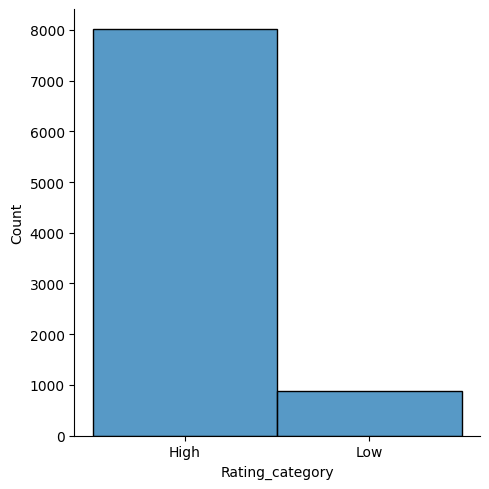

In [21]:
sns.displot(kind = 'hist', x=Apps_new2['Rating_category'])
plt.show()

#### Observations

- In 'Rating category' there are more number of <font color = green>**high's**</font> than <font color = red>**low's**</font>

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [22]:
Apps_new2['Reviews'] = pd.to_numeric(Apps_new2['Reviews'])

In [23]:
Apps_new2.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

#### 'Reviews' are converted to numeric data type. 

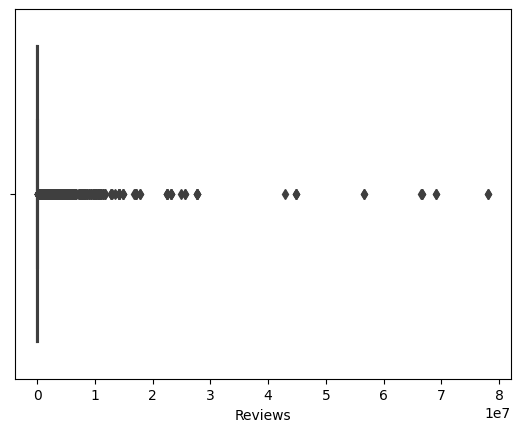

In [24]:
sns.boxplot(x = Apps_new2['Reviews']);

#### There are lot of outliers in the data,so we use log transformation to remove the outliers.

In [25]:
log = FunctionTransformer(np.log1p)

In [26]:
Apps_new2['Reviews'] = pd.DataFrame(log.fit_transform(Apps_new2['Reviews']))

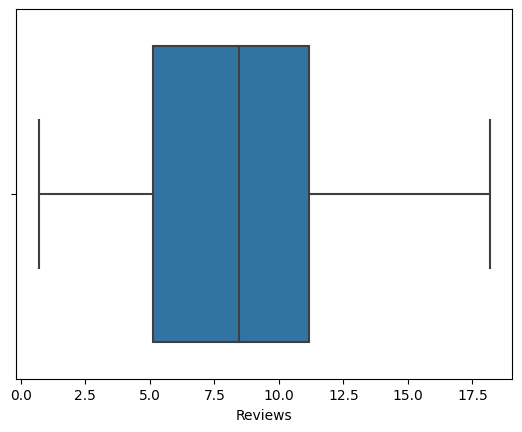

In [27]:
sns.boxplot(x=Apps_new2['Reviews']);

#### The outliers are removed using log transformation.

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [28]:
Apps_new2['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

#### Here there are entries with the string object type 'Varies with device', first we remove them.

In [29]:
Apps_new3 = Apps_new2[Apps_new2['Size']!='Varies with device']

In [30]:
Apps_new3['Size'] = Apps_new3['Size'].replace({"k":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [31]:
Apps_new3['Size'].unique()

array([ 19000000,  14000000,   8700000,  25000000,   2800000,   5600000,
        29000000,  33000000,   3100000,  28000000,  12000000,  20000000,
        21000000,  37000000,   2700000,   5500000,  17000000,  39000000,
        31000000,   4200000,  23000000,   6000000,   6100000,   4600000,
         9200000,   5200000,  11000000,  24000000,   9400000,  15000000,
        10000000,   1200000,  26000000,   8000000,   7900000,  56000000,
        57000000,  35000000,  54000000,    201000,   3600000,   5700000,
         8600000,   2400000,  27000000,   2500000,   7000000,  16000000,
         3400000,   8900000,   3900000,   2900000,  38000000,  32000000,
         5400000,  18000000,   1100000,   2200000,   4500000,   9800000,
        52000000,   9000000,   6700000,  30000000,   2600000,   7100000,
        22000000,   6400000,   3200000,   8199999,   4900000,   9500000,
         5000000,   5900000,  13000000,  73000000,   6800000,   3500000,
         4000000,   2300000,   2100000,  42000000, 

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [32]:
Apps_new3['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [33]:
Apps_new3['Installs'] = Apps_new3['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [34]:
Apps_new3['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

In [35]:
Apps_new3['Installs'].dtypes

dtype('int32')

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [36]:
Apps_new3['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [37]:
Apps_new3['Price'] = Apps_new3['Price'].str.replace('$','').astype(float)

In [38]:
Apps_new3['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [39]:
Apps_new3['Price'].dtypes

dtype('float64')

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [40]:
Apps_new3.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

#### Columns which are redundant for the analysis are <font color = red>'App', 'Rating' , 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'</font>. We drop them.

In [41]:
Apps_new4= Apps_new3.drop(Apps_new3[['App', 'Rating' , 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']],axis=1)

In [42]:
Apps_new4.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

## 13. Encode the categorical columns.


In [43]:
lc= LabelEncoder()

In [44]:
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col] = lc.fit_transform(list(df[col]))

In [45]:
categorical_to_numeric(Apps_new4)

In [46]:
Apps_new4.dtypes

Category             int64
Reviews            float64
Size                 int32
Installs             int32
Type                 int64
Price              float64
Content Rating       int64
Rating_category      int64
dtype: object

## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [47]:
y = Apps_new4[['Rating_category']]
X = Apps_new4.drop('Rating_category',axis=1)

In [48]:
y.columns

Index(['Rating_category'], dtype='object')

In [49]:
X.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating'],
      dtype='object')

## 15. Split the dataset into train and test.

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=555)

In [51]:
X_train.shape

(5568, 7)

In [52]:
X_test.shape

(1856, 7)

In [53]:
y_train.shape

(5568, 1)

In [54]:
y_test.shape

(1856, 1)

## 16. Standardize the data, so that the values are within a particular range.

#### We use MinMaxScaler to Standardize the data.

In [55]:
ms = MinMaxScaler()

In [56]:
X_train = pd.DataFrame(ms.fit_transform(X_train))
X_test = pd.DataFrame(ms.fit_transform(X_test))
y_train = pd.DataFrame(ms.fit_transform(y_train))
y_test = pd.DataFrame(ms.fit_transform(y_test))

In [57]:
X_train.min()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [58]:
X_train.max()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

In [59]:
X_test.min()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64

In [60]:
X_test.max()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

In [61]:
y_test.min()

0    0.0
dtype: float64

In [62]:
y_test.max()

0    1.0
dtype: float64

In [63]:
y_train.min()

0    0.0
dtype: float64

In [64]:
y_train.max()

0    1.0
dtype: float64

- **The values are between 0 and 1**.